In [42]:
# Import some dependency libraries that we are going to need to run the SSD model

import numpy as np
import requests
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import onnx_ml_pb2 as onnx_ml_pb2
import predict_pb2 as predict_pb2

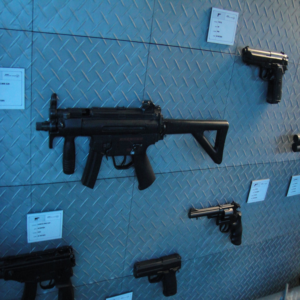

In [43]:
# Load the raw image

input_shape = (1, 3, 300, 300)
img = Image.open("handgun.jpg")
img = img.resize((300, 300), Image.BILINEAR)

# Let us see what the input image looks like
img

In [44]:
img_data = np.array(img)
img_data = np.transpose(img_data, [2, 0, 1])
img_data = np.expand_dims(img_data, 0)
mean_vec = np.array([0.485, 0.456, 0.406])
stddev_vec = np.array([0.229, 0.224, 0.225])
norm_img_data = np.zeros(img_data.shape).astype('float32')
for i in range(img_data.shape[1]):
    norm_img_data[:,i,:,:] = (img_data[:,i,:,:]/255 - mean_vec[i]) / stddev_vec[i]

In [45]:
# Create request message to be sent to the ORT server

input_tensor = onnx_ml_pb2.TensorProto()
input_tensor.dims.extend(norm_img_data.shape)
input_tensor.data_type = 1
input_tensor.raw_data = norm_img_data.tobytes()

request_message = predict_pb2.PredictRequest()

# For your model, the inputs name should be something else customized by yourself. Use Netron to find out the input name.
request_message.inputs["input.1"].data_type = input_tensor.data_type
request_message.inputs["input.1"].dims.extend(input_tensor.dims)
request_message.inputs["input.1"].raw_data = input_tensor.raw_data

content_type_headers = ['application/x-protobuf', 'application/octet-stream', 'application/vnd.google.protobuf']

for h in content_type_headers:
    request_headers = {
        'Content-Type': h,
        'Accept': 'application/x-protobuf'
    }

In [46]:
PORT_NUMBER = 9001 # Change appropriately if needed based on any changes when invoking the server in the pre-requisites
inference_url = "http://127.0.0.1:" + str(PORT_NUMBER) + "/v1/models/default/versions/1:predict"
response = requests.post(inference_url, headers=request_headers, data=request_message.SerializeToString())


In [47]:
# Parse response message

response_message = predict_pb2.PredictResponse()
response_message.ParseFromString(response.content)

# For your model, the outputs names should be something else customized by yourself. Use Netron to find out the outputs names.
boxes = np.frombuffer(response_message.outputs['boxes'].raw_data, dtype=np.float32)
#labels = np.frombuffer(response_message.outputs['labels'].raw_data, dtype=np.int64)
scores = np.frombuffer(response_message.outputs['scores'].raw_data, dtype=np.float32)

print('Boxes shape:', response_message.outputs['boxes'].dims)
#print('Labels shape:', response_message.outputs['labels'].dims)
print('Scores shape:', response_message.outputs['scores'].dims)

Boxes shape: [1, 3000, 4]
Scores shape: [1, 3000, 3]


<Figure size 432x288 with 0 Axes>

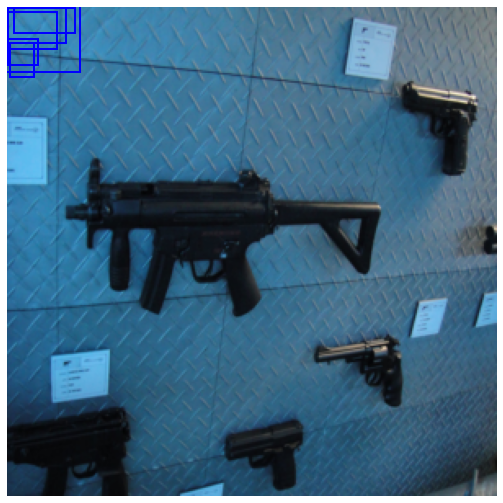

In [48]:
## Display image with bounding boxes and appropriate class 

# Parse the list of class labels
classes = [line.rstrip('\n') for line in open('labels.txt')]

# Plot the bounding boxes on the image
plt.figure()
fig, ax = plt.subplots(1, figsize=(12,9))
ax.imshow(img)

resized_width = 300  # we resized the original image, remember ? 
resized_height = 300
num_boxes = 6 # we limit displaying to just 10 boxes to avoid clogging the result image with boxes
               # The results are already sorted based on box confidences, so we just pick top N boxes without sorting
    
for c in range(num_boxes):    
    base_index = c * 4
    y1, x1, y2, x2 = boxes[base_index] * resized_height, boxes[base_index + 1] * resized_width, boxes[base_index + 2] * resized_height, boxes[base_index + 3] * resized_width 
    color = 'blue'
    box_h = (y2 - y1)
    box_w = (x2 - x1)
    bbox = patches.Rectangle((y1, x1), box_h, box_w, linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(bbox)
    #plt.text(y1, x1, s=classes[labels[c] - 1], color='white', verticalalignment='top', bbox={'color': color, 'pad': 0})
plt.axis('off')

# Save image
#plt.savefig("output/ssd_result.jpg", bbox_inches='tight', pad_inches=0.0)
plt.show()

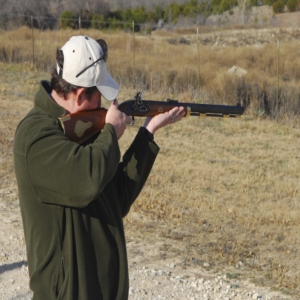

In [49]:
input_shape = (1, 3, 300, 300)
img = Image.open("shotgun.jpg")
img = img.resize((300, 300), Image.BILINEAR)

# Let us see what the input image looks like
img

In [50]:
img_data = np.array(img)
img_data = np.transpose(img_data, [2, 0, 1])
img_data = np.expand_dims(img_data, 0)
mean_vec = np.array([0.485, 0.456, 0.406])
stddev_vec = np.array([0.229, 0.224, 0.225])
norm_img_data = np.zeros(img_data.shape).astype('float32')
for i in range(img_data.shape[1]):
    norm_img_data[:,i,:,:] = (img_data[:,i,:,:]/255 - mean_vec[i]) / stddev_vec[i]

In [51]:
# Create request message to be sent to the ORT server

input_tensor = onnx_ml_pb2.TensorProto()
input_tensor.dims.extend(norm_img_data.shape)
input_tensor.data_type = 1
input_tensor.raw_data = norm_img_data.tobytes()

request_message = predict_pb2.PredictRequest()

# For your model, the inputs name should be something else customized by yourself. Use Netron to find out the input name.
request_message.inputs["input.1"].data_type = input_tensor.data_type
request_message.inputs["input.1"].dims.extend(input_tensor.dims)
request_message.inputs["input.1"].raw_data = input_tensor.raw_data

content_type_headers = ['application/x-protobuf', 'application/octet-stream', 'application/vnd.google.protobuf']

for h in content_type_headers:
    request_headers = {
        'Content-Type': h,
        'Accept': 'application/x-protobuf'
    }

In [52]:
PORT_NUMBER = 9001 # Change appropriately if needed based on any changes when invoking the server in the pre-requisites
inference_url = "http://127.0.0.1:" + str(PORT_NUMBER) + "/v1/models/default/versions/1:predict"
response = requests.post(inference_url, headers=request_headers, data=request_message.SerializeToString())


In [53]:
# Parse response message

response_message = predict_pb2.PredictResponse()
response_message.ParseFromString(response.content)

# For your model, the outputs names should be something else customized by yourself. Use Netron to find out the outputs names.
boxes = np.frombuffer(response_message.outputs['boxes'].raw_data, dtype=np.float32)
#labels = np.frombuffer(response_message.outputs['labels'].raw_data, dtype=np.int64)
scores = np.frombuffer(response_message.outputs['scores'].raw_data, dtype=np.float32)

print('Boxes shape:', response_message.outputs['boxes'].dims)
#print('Labels shape:', response_message.outputs['labels'].dims)
print('Scores shape:', response_message.outputs['scores'].dims)

Boxes shape: [1, 3000, 4]
Scores shape: [1, 3000, 3]


<Figure size 432x288 with 0 Axes>

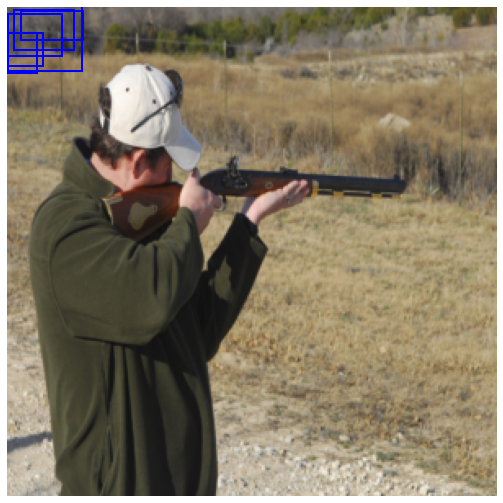

In [54]:
## Display image with bounding boxes and appropriate class 

# Parse the list of class labels
classes = [line.rstrip('\n') for line in open('labels.txt')]

# Plot the bounding boxes on the image
plt.figure()
fig, ax = plt.subplots(1, figsize=(12,9))
ax.imshow(img)

resized_width = 300  # we resized the original image, remember ? 
resized_height = 300
num_boxes = 6 # we limit displaying to just 10 boxes to avoid clogging the result image with boxes
               # The results are already sorted based on box confidences, so we just pick top N boxes without sorting
    
for c in range(num_boxes):    
    base_index = c * 4
    y1, x1, y2, x2 = boxes[base_index] * resized_height, boxes[base_index + 1] * resized_width, boxes[base_index + 2] * resized_height, boxes[base_index + 3] * resized_width 
    color = 'blue'
    box_h = (y2 - y1)
    box_w = (x2 - x1)
    bbox = patches.Rectangle((y1, x1), box_h, box_w, linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(bbox)
    #plt.text(y1, x1, s=classes[labels[c] - 1], color='white', verticalalignment='top', bbox={'color': color, 'pad': 0})
plt.axis('off')

# Save image
#plt.savefig("output/ssd_result.jpg", bbox_inches='tight', pad_inches=0.0)
plt.show()